# Film Industry Data Analysis for Microsoft Movie Studio

## 1. Business Understanding

## 1.1 Problem Statement 

In its continued growth, Microsoft has seen a business opportunity in the film industry, prompting the company to create the Microsoft Movie Studio(MMS) business segment. The head of MMS is looking for data centric insights from the film industry to aid in decision making on which films MMS should focus on to ensure business success. Microsoft has charged us to carry out exploratory data analyis on the film industry and come up with three main recommendations that will ensure MMS business success.

## 1.2 Project Objectives

* Analyze film industry data and generate insights on best performing movies and their drivers
* Provide top recommendations on films that Microsoft can focus on

## 1.3 Context - Movie Industry Overview

The movie industry, also known as the film industry, is a vast sector that encompasses the creation, production, distribution, and exhibition of movies. It is a global industry with a rich history and a significant cultural and economic impact. In 2019 the industy, the global box office generated $42.5B. Revenues in this industry can vary significantly depending on factors such as box office performance, home video sales, streaming rights, merchandising and licensing deals. 

The success of a movie depends on many factors, key of which include:
* Story and content - captivating story lines
* Cast and crew - i.e. talented actors, directors, writers, & other creatives
* Marketing and distribution including effective marketing, strategic release dates, and wide distribution networks to reach target audiences
* Critical reception - Positive reviews from critics and word-of-mouth recommendations can help generate buzz and drive audience interest
* Genre and audience appeal - Different genres have distinct audience demographics, and understanding the target market is crucial for success

The movie industry has seen a revolution in recent times with rise of streaming services. The industry continues to expand globally with enablement of the internet, creating more investiment opportunities. Other technological advancements such as 3D, virtual reality and enhanced sound systems continue to enhance the movie-watching experience, further opening up the market.

## 2. Data overview

The data was obtained from various movie websites and the IMDB database. These sources track movie attributes to various degrees e.g., titles, revenues, studios, years of release, movie ratings and other similar information. 

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

In our analysis,we focussed on identifying and analyzing the five key factors discussed above, as key drivers for movie success. For clarity the factors are: Story & Content, Cast & Crew, Marketing & Distribution, Critical Perception and Genre & Audience Appeal. In abscence of enough data on these key factors, we will relied on box office revenues generated.
In accordance to this approach, we observed that data from The MovieDB and The numbers had limited features and contained none of the five movie success factors hence decision to exclude their datasets from the exploratory analysis.

## 3.0 Data Analysis Approach

The data analysis phase will involve the following steps:
1. Loading the data to pandas and analyzing the dataframes
2. Cleaning the data by checking & handling:
    * Duplicates
    * Missing data
    * Anomalies
    * Invalid data
    * Other additional data cleaning procedures as needed
3. Performing exploratory anaysis
4. Drawing conclusions
5. Making recommendations

## 4.0 Loading the Data

### 4.1 Importing Libraries

In [2]:
# Importing required libraries
import sqlite3
import zipfile
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 4.2 Loading the Data & Exploring Dataframes

#### 4.2.1 CSV files

In [3]:
# Extracting zipped file
with zipfile.ZipFile("phase-1-project master zippedData.zip") as z:
   z.extractall()

In [4]:
# Loading csv files using pandas
df_bom_movie = pd.read_csv('bom.movie_gross.csv.gz')
df_bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
df_bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


##### df_bom_movies observations
* They contain domestic and foreign revenues which is a key metric
* Studio is potentially a key field to compare revenue by studio
* Assumption: Amounts in USD. 
* Missing the key factors of success i.e. Story & Content, Cast & Crew, Marketing & Distribution, Critical Perception and Genre & Audience Appeal.

In [75]:
# Loading csv files using pandas
df_rt_movie = pd.read_csv('rt.movie_info.tsv.gz', delimiter='\t')
df_rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [76]:
df_rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


#### Observations on df_rt_movie
* Contains more attributes. Cast & Crew (i.e Director), Marketing & Distribution (dates of release), Critical Perception and Genre. The Rating column tells of suitable audience i.e. Restricted (R) and NR (Not Rated - for all)
* Important to note the some columns are missing values hence need to drop data alot of data. 
* Next steps: Evaluate if can be merged with other files. Analyze relationship between Director, Genre on Box office revenues.


In [7]:
# Loading csv file 
df_rt_reviews = pd.read_csv('rt.reviews.tsv.gz', delimiter='\t', encoding='latin-1')
df_rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [39]:
df_rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


#### Observations on df_rt_reviews
* It seems df_rt_reviews and df_rt_movies can be merged using id column. Assumption here is that the Id column is a unique identifier of a movie in question in the Rotten Tomatoes site.

In [48]:
# Merging df_rt_reviews and df_rt_movie 
merged_df_rt = pd.merge(df_rt_reviews, df_rt_movie, on='id')
merged_df_rt.tail()

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002","Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005","Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005","Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003","Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002","Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


Observation on merged_df_rt
* Provides more fields in one file hence more analysis.

In [50]:
merged_df_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54432 non-null  int64 
 1   review        48869 non-null  object
 2   rating_x      40915 non-null  object
 3   fresh         54432 non-null  object
 4   critic        51710 non-null  object
 5   top_critic    54432 non-null  int64 
 6   publisher     54123 non-null  object
 7   date          54432 non-null  object
 8   synopsis      54300 non-null  object
 9   rating_y      54346 non-null  object
 10  genre         54345 non-null  object
 11  director      48992 non-null  object
 12  writer        45206 non-null  object
 13  theater_date  53206 non-null  object
 14  dvd_date      53206 non-null  object
 15  currency      33310 non-null  object
 16  box_office    33310 non-null  object
 17  runtime       53594 non-null  object
 18  studio        40125 non-null  object
dtypes: i

In [40]:
# Loading csv files using pandas
df_tmdb_movie = pd.read_csv('tmdb.movies.csv.gz', delimiter=',')
df_tmdb_movie.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [41]:
df_tmdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Observation on df_tmdb_movie (Source: The MovieDB)
* None of the 5 factors that determine movie success are availabe in this dataset, hence decision to exclude from further analysis


In [42]:
# Loading csv files using pandas
df_tn_movie = pd.read_csv('tn.movie_budgets.csv.gz', delimiter=',')
df_tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Observation on df_tn_movie (source: The Numbers)

None of the 5 factors that determine movie success are availabe in this dataset, hence decision to exclude from further analysis

#### 4.2.2 IMDB files

According to project instructions, the IMDB files were to be contained in a zipped file (im.db.zip) and were to be accessed via SQLite database. Though, the zipped file was not found and in its place were 5 csv.gz files. This lead to loading the files into pandas and reading them with pd.read_csv as below:

In [44]:
# Loading csv files using pandas
df_imdb_namebasics = pd.read_csv('imdb.name.basics.csv.gz', delimiter=',')
df_imdb_namebasics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [22]:
df_imdb_namebasics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [22]:
# Loading csv files using pandas
df_imdb_titlebasics = pd.read_csv('imdb.title.basics.csv.gz', delimiter=',')
df_imdb_titlebasics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [23]:
df_imdb_titlebasics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [26]:
# Loading csv files using pandas
df_imdb_titleratings = pd.read_csv('imdb.title.ratings.csv.gz', delimiter=',')
df_imdb_titleratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [27]:
df_imdb_titleratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [20]:
# Loading csv files using pandas
df_imdb_titlecrew = pd.read_csv('imdb.title.crew.csv.gz', delimiter=',')
df_imdb_titlecrew.tail()

,tconst,directors,writers
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825
146143,tt9010172,NaN,nm8352242


Observation on IMDB files
The files contain limited data as stand alone tables hence need to merge them as below

In [36]:
# Merging IMDB files - df_imdb_titlebasics, df_imdb_titleratings and df_imdb_titlecrew
merged_df_imdb = pd.merge(pd.merge(df_imdb_titlebasics, df_imdb_titleratings, on='tconst'), df_imdb_titlecrew, on='tconst')
merged_df_imdb.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6,nm0812850,"nm0812850,nm10121762"
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,nm4394529,"nm4394529,nm1902682"
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859,"nm5300859,nm7332227"
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5,nm1716653,"nm3678448,nm9361716"
73855,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11,nm5684093,NaN


In [37]:
merged_df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
 8   directors        73104 non-null  object 
 9   writers          63295 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 5.6+ MB


## 5.0 Cleaning the Data

In this section we will be conducting data cleaning for five main dataframes. Despite the merging conducted in previous section, it was observed that the df_rt_reviews and df_rt_movie dataframes have important features that can be analyzed separately and also when the two dataframes are merged.
* df_bom_movie
* df_rt_movie
* df_rt_reviews
* merged_df_rt
* merged_df_imdb

#### 5.1 Checking for and handling duplicate rows

In [42]:
# Defining a function to apply across the 3 dfs
def check_duplicates(df):
    duplicates = df.duplicated().sum()
    initial_rows = len(df)
    final_rows = initial_rows - duplicates
    print(f"Initial rows: {initial_rows}, Duplicated rows: {duplicates}, Final rows: {final_rows}")

In [44]:
# Checking for duplicates in df_bom_movie
check_duplicates(df_bom_movie)

Initial rows: 3387, Duplicated rows: 0, Final rows: 3387


In [45]:
# Checking for duplicates in merged_df_rt
check_duplicates(merged_df_rt)

Initial rows: 54432, Duplicated rows: 9, Final rows: 54423


In [43]:
# Checking for duplicates in merged_df_imdb
check_duplicates(merged_df_imdb)

Initial rows: 73856, Duplicated rows: 0, Final rows: 73856


In [51]:
# Checking for duplicates in df_rt_reviews
check_duplicates(df_rt_reviews)

Initial rows: 54432, Duplicated rows: 9, Final rows: 54423


In [52]:
# Checking for duplicates in df_rt_movie
check_duplicates(df_rt_movie)

Initial rows: 1560, Duplicated rows: 0, Final rows: 1560


In [82]:
# Dropping duplicates in df_rt_reviews
df_rt_reviews.drop_duplicates(inplace = True)

In [83]:
# Dropping duplicates in merged_df_rt
merged_df_rt.drop_duplicates(inplace = True)

#### 5.2 Checking and handling missing data

In [59]:
# Checking for nans
def find_nans(df):
    #loop through all columns 
    for column in df.columns:
        sum_nan_rows = df[column].isna().sum()
        initial_rows = len(df)
        final_rows = initial_rows - sum_nan_rows
        print(f"Column {column}: Initial rows: {initial_rows}, Null rows: {sum_nan_rows}, Non null rows: {final_rows}")

#### df_bom_movie

In [60]:
# Example - Checking for nulls in df_bom_movie
find_nans(df_bom_movie)

Column title: Initial rows: 3387, Null rows: 0, Non null rows: 3387
Column studio: Initial rows: 3387, Null rows: 5, Non null rows: 3382
Column domestic_gross: Initial rows: 3387, Null rows: 28, Non null rows: 3359
Column foreign_gross: Initial rows: 3387, Null rows: 1350, Non null rows: 2037
Column year: Initial rows: 3387, Null rows: 0, Non null rows: 3387


In section 4.2, we printed out information for each dataframe. In the dataframes with null entries, we will go ahead and drop null rows

In [62]:
df_bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Observations: All columns except foreign gross have > 3000 values out of a total 3387. Hence we will drop the null rows for all columns and for foreign_gross we will replace null values with zero

In [63]:
# drop null rows from columns with missing values except foreign_gross
df_bom_movie.dropna(inplace = True, subset = ['studio','domestic_gross'])


In [64]:
#replace missing values with 0 in foreign_gross column
df_bom_movie.foreign_gross.fillna('0',inplace = True)

In [65]:
#Inspecting resulting df:
df_bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


#### df_rt_movie

In [67]:
# Inspecting intial df
df_rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


Observation:
Total rows are 1560. For columns with < 500 values, we will drop them as they have >50% of data missing. For columns with >500 values, we will drop the rows with missing values

In [77]:
# Dropping columns with < 500 entries
df_rt_movie.drop(['currency','box_office','studio'], axis = 1, inplace=True)

In [78]:
print(df_rt_movie.columns)

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'runtime'],
      dtype='object')


In [79]:
# Dropping rows with missing values
df_rt_movie.dropna(subset = ['synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'runtime'],inplace = True)

In [80]:
#Inspecting resulting df:
df_rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881 entries, 0 to 1558
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            881 non-null    int64 
 1   synopsis      881 non-null    object
 2   rating        881 non-null    object
 3   genre         881 non-null    object
 4   director      881 non-null    object
 5   writer        881 non-null    object
 6   theater_date  881 non-null    object
 7   dvd_date      881 non-null    object
 8   runtime       881 non-null    object
dtypes: int64(1), object(8)
memory usage: 68.8+ KB


#### df_rt_reviews

In [85]:
# Review original dataframe
df_rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54423 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54423 non-null  int64 
 1   review      48867 non-null  object
 2   rating      40907 non-null  object
 3   fresh       54423 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54423 non-null  int64 
 6   publisher   54114 non-null  object
 7   date        54423 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.7+ MB


Observation: 
* The file has alot of entries for every column, hence decision to drop rows with missing values.
* According to Rotten Tomatoes site, the rating column represents User Ratings inform of Stars. The fresh column represents approved critics' reviews. A movie can fall into 3 approval ratings Fresh (60%+ critics voted its a good movie), Rotten (<=59% critics voted its a bad movie). 
* Accordingly, both columns can be used to determine movie popularity. Though lets extend df analysis to understand the values therein contained.

In [87]:
df_rt_reviews.rating.unique()

array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
  

In [88]:
df_rt_reviews.fresh.unique()

array(['fresh', 'rotten'], dtype=object)

Observation 2
* The rating column comes in nonconsitent formats hence potential difficulty using this this column. We will keep the column though will utilize the fresh column that has two categories.

In [89]:
#drop rows with null values
df_rt_reviews.dropna(inplace = True)

In [90]:
#Inspecting resulting df:
df_rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33988 entries, 0 to 54424
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          33988 non-null  int64 
 1   review      33988 non-null  object
 2   rating      33988 non-null  object
 3   fresh       33988 non-null  object
 4   critic      33988 non-null  object
 5   top_critic  33988 non-null  int64 
 6   publisher   33988 non-null  object
 7   date        33988 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.3+ MB


#### merged_df_imdb

In [91]:
# Inspecting intial df
merged_df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
 8   directors        73104 non-null  object 
 9   writers          63295 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 5.6+ MB


In [93]:
#dropping rows with missing values
merged_df_imdb.dropna(subset = ['runtime_minutes','genres','directors', 'writers'],inplace = True)

In [96]:
#Inspecting resulting df
merged_df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56957 entries, 0 to 73852
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           56957 non-null  object 
 1   primary_title    56957 non-null  object 
 2   original_title   56957 non-null  object 
 3   start_year       56957 non-null  int64  
 4   runtime_minutes  56957 non-null  float64
 5   genres           56957 non-null  object 
 6   averagerating    56957 non-null  float64
 7   numvotes         56957 non-null  int64  
 8   directors        56957 non-null  object 
 9   writers          56957 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 4.8+ MB


#### 5.3 Other data cleaning procedures - data structure, invalid data and other anomalies

#### df_bom_movie

In [124]:
# Convert dtype for foreign_gross from object to float64 to enable calculations
df_bom_movie.foreign_gross = df_bom_movie.foreign_gross.astype(float)

In [125]:
#Validating that numerical operations will work
df_bom_movie['foreign_gross'].sum()

152111302376.5

In [126]:
#Validating that numerical operations will work
df_bom_movie['domestic_gross'].sum() 

96557118980.0

In [102]:
#Reviewing unique values in column year
df_bom_movie['year'].unique() 

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

#### df_rt_movie

In [104]:
#Reviewing value_counts values in column theater_date
df_rt_movie['theater_date'].value_counts()

theater_date
Jan 1, 1987     6
Jan 1, 1988     4
Jan 1, 1966     4
Jan 1, 1973     4
Aug 13, 2010    3
               ..
Dec 14, 1984    1
Dec 19, 1990    1
Aug 7, 1987     1
Jan 24, 2014    1
Apr 1, 1993     1
Name: count, Length: 771, dtype: int64

The above analysis shows that the 'theater day' which we're assuming to be movie release day does not show any particular preference for specific days in the year as part of marketing strategy.

In [105]:
# Remove structural issues i.e.genre & writer columns separated by pipe
df_rt_movie = df_rt_movie.assign(genre=df_rt_movie.genre.str.split('|')).explode('genre')

In [107]:
# Remove structural issues i.e.genre & writer columns separated by pipe
df_rt_movie = df_rt_movie.assign(writer=df_rt_movie.writer.str.split('|')).explode('writer')

In [108]:
df_rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
0,1,"This gritty, fast-paced, and innovative police...",R,Classics,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
0,1,"This gritty, fast-paced, and innovative police...",R,Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",108 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes


#### df_rt_reviews

No structural issues or other cleaning procedures needed

#### merged_df_imdb

In [111]:
merged_df_imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,nm0000080,"nm0000080,nm0462648"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,"nm0765384,nm0749914","nm1360635,nm0749914"
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,nm0365480,nm0365480
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451,nm1030585,"nm1030585,nm1921430"


In [112]:
# Remove structural issue i.e.genre column separated by comma
merged_df_imdb = merged_df_imdb.assign(genres=merged_df_imdb.genres.str.split(',')).explode('genres')

In [113]:
# Remove structural issue i.e.directors column separated by comma
merged_df_imdb = merged_df_imdb.assign(directors=merged_df_imdb.directors.str.split(',')).explode('directors')

In [114]:
# Remove structural issue i.e.writers column separated by comma
merged_df_imdb = merged_df_imdb.assign(writers=merged_df_imdb.writers.str.split(',')).explode('writers')

In [115]:
merged_df_imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77,nm0712540,nm0023551
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77,nm0712540,nm1194313
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77,nm0712540,nm0347899
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77,nm0712540,nm1391276
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77,nm0712540,nm0023551


#### 5.4 Merging various files

#### df_rt_movie and df_rt_reviews

In [116]:
# Merging df_rt_reviews and df_rt_movie 
merged_df_rt = pd.merge(df_rt_reviews, df_rt_movie, on='id')
merged_df_rt.tail()

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,runtime
97641,1999,Old baseball wisdom: The best teams win with s...,B+,fresh,Bob Cannon,1,Entertainment Weekly,"April 1, 1993",The Sandlot is a coming-of-age story about a g...,PG,Drama,David Mickey Evans,Robert Gunter,"Apr 1, 1993","Jan 29, 2002",101 minutes
97642,1999,Old baseball wisdom: The best teams win with s...,B+,fresh,Bob Cannon,1,Entertainment Weekly,"April 1, 1993",The Sandlot is a coming-of-age story about a g...,PG,Kids and Family,David Mickey Evans,David Mickey Evans,"Apr 1, 1993","Jan 29, 2002",101 minutes
97643,1999,Old baseball wisdom: The best teams win with s...,B+,fresh,Bob Cannon,1,Entertainment Weekly,"April 1, 1993",The Sandlot is a coming-of-age story about a g...,PG,Kids and Family,David Mickey Evans,Robert Gunter,"Apr 1, 1993","Jan 29, 2002",101 minutes
97644,1999,Old baseball wisdom: The best teams win with s...,B+,fresh,Bob Cannon,1,Entertainment Weekly,"April 1, 1993",The Sandlot is a coming-of-age story about a g...,PG,Sports and Fitness,David Mickey Evans,David Mickey Evans,"Apr 1, 1993","Jan 29, 2002",101 minutes
97645,1999,Old baseball wisdom: The best teams win with s...,B+,fresh,Bob Cannon,1,Entertainment Weekly,"April 1, 1993",The Sandlot is a coming-of-age story about a g...,PG,Sports and Fitness,David Mickey Evans,Robert Gunter,"Apr 1, 1993","Jan 29, 2002",101 minutes


## 6.0 Performing Exploratory analysis

As established in Section 1.3, the key factors of movie success are: Story & Content, Cast & Crew, Marketing & Distribution, Critical Perception and Genre & Audience Appeal.

From the cleaned datasets, we can be able to generate the analysis below:
1. The highest grossing studios
2. The highest rated genres 
3. Best perfoming directors (in relation to movie reviews)

### 6.1 Highest Grossing Studios

In [131]:
#setting the plot style
plt.style.use('ggplot')

In [132]:
# Using df_bom_movie gross information
#Establish a new column with total gross revenues
df_bom_movie['total_gross'] = df_bom_movie.domestic_gross + df_bom_movie.foreign_gross

In [133]:
#Group total_gross by studio, sum up and sort values to establish highest to lowest perfoming studios
bom_studios = df_bom_movie.groupby(['studio'])['total_gross'].sum().to_frame()
bom_studios = bom_studios.sort_values('total_gross',ascending = False)[:10]

FileNotFoundError: [Errno 2] No such file or directory: 'Images/studios.png'

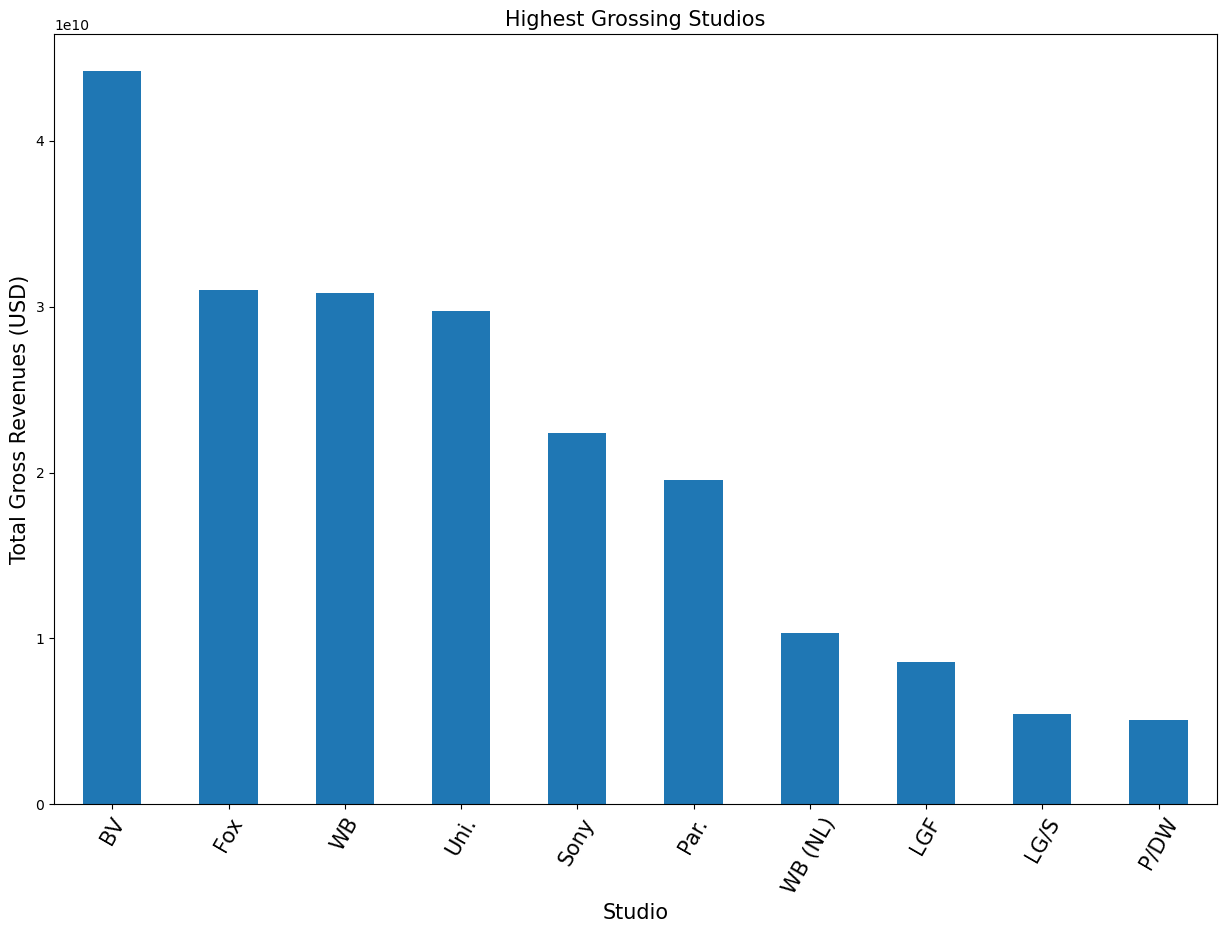

In [130]:
#Plotting a bar graph of highest grossing studios
fig,ax = plt.subplots(figsize=(15,10))

title = 'Highest Grossing Studios'
y_label = 'Total Gross Revenues (USD)'
x_label = 'Studio'

bom_studios.total_gross.plot(kind='bar')
ax.set_title(title,fontsize=15)
ax.set_ylabel(y_label,fontsize=15)
ax.set_xlabel(x_label,fontsize=15)
plt.xticks(rotation = 60,fontsize=15)
fig.savefig('Images/studios.png');